# Import Libraries

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Obtain Data

Read csv file with medal counts into Pandas

In [2]:
medals_df = pd.read_csv('Data/medals.csv')
medals_df.columns = ['Olympic Country', 'Gold', 'Silver', 'Bronze', 'Totals']
print(medals_df.shape)
medals_df.head()

(93, 5)


,Olympic Country,Gold,Silver,Bronze,Totals
0,United States,39,41,33,113
1,China,38,32,18,88
2,Japan,27,14,17,58
3,Great Britain,22,21,22,65
4,Russian Olympic Committee,20,28,23,71


Read csv file with country indicator data into pandas

In [3]:
indicators_df = pd.read_csv('Data/indicators.csv')
indicators_df.columns = ['Indicator Country', 'Health Expenditure (% of GDP)', 'GDP Per Capita', 'Gini Index', 
                         'Education Expenditure (% of GDP)', 'Migrant Population Proportion', 
                         'Air Pollution Exposure', 'Ages 20-24 Female Population Proportion',
                         'Ages 20-24 Male Population Proportion', 'Ages 25-29 Female Population Proportion',
                         'Ages 25-29 Male Population Proportion', 'Ages 30-34 Female Population Proportion',
                         'Ages 30-34 Male Population Proportion', 'Population', 'Urban Population Proportion']
indicators_df.head()

,Indicator Country,Health Expenditure (% of GDP),GDP Per Capita,Gini Index,Education Expenditure (% of GDP),Migrant Population Proportion,Air Pollution Exposure,Ages 20-24 Female Population Proportion,Ages 20-24 Male Population Proportion,Ages 25-29 Female Population Proportion,Ages 25-29 Male Population Proportion,Ages 30-34 Female Population Proportion,Ages 30-34 Male Population Proportion,Population,Urban Population Proportion
0,Afghanistan,9.395727,1978.961579,NaN,3.21378,1.175547,56.910808,10.073862,10.098379,7.907260,8.063549,6.221683,6.503323,38928341.0,26.026000
1,Africa Eastern and Southern,5.925882,3371.814704,NaN,4.71930,1.734768,35.512988,9.218579,9.355607,7.906863,7.947182,6.763558,6.723442,677243299.0,36.783306
2,Africa Western and Central,4.004790,3995.039927,NaN,3.03285,2.079691,58.064482,8.940792,9.041989,7.522335,7.578698,6.425444,6.427822,458803476.0,47.848625
3,Albania,5.262714,13295.410885,33.2,3.94576,1.989036,18.200603,7.853874,8.013442,8.138641,8.828823,7.168070,8.372488,2837743.0,62.112000
4,Algeria,6.218427,10681.679297,27.6,6.10036,0.611072,38.884011,6.769581,6.910889,8.120237,8.179230,8.527349,8.474931,43851043.0,73.733000


Read csv file with list of olympic countries into Pandas

In [4]:
countries_df = pd.read_csv('Data/olympic_countries.csv')
countries_df['Country'] = countries_df['Country'].apply(lambda x: x.strip())
countries_df.head()

,Country
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra


# Scrub Data

View list of countries whose names are different in medals_df and countries_df 

In [5]:
test_df = pd.merge(countries_df, medals_df, left_on='Country', right_on='Olympic Country', how='right')
print(test_df[test_df['Country'].isna()]['Olympic Country'].values)

['United States' 'China' 'Russian Olympic Committee' 'South Korea' 'Iran'
 'Hong Kong' 'Ivory Coast' 'Syria' 'Moldova']


Replace different country names from medals_df with the corresponding name from countries_df and merge the two dfs

In [6]:
countries_replace_dict = {'United States': 'United States of America', 'China': "People's Republic of China",
                          'Russian Olympic Committee': 'ROC*', 'South Korea': 'Republic of Korea', 'Iran':
                          'Islamic Republic of Iran', 'Hong Kong': 'Hong Kong, China', 
                          'Ivory Coast' : "Côte d'Ivoire", 'Syria' : 'Syrian Arab Republic', 
                          'Moldova' : 'Republic of Moldova'}
medals_df['Olympic Country'] = medals_df['Olympic Country'].replace(countries_replace_dict)
df = pd.merge(countries_df, medals_df, left_on='Country', right_on='Olympic Country', how='left')
df.drop(columns='Olympic Country', inplace=True)
print(df.shape)
df.head()

(206, 5)


,Country,Gold,Silver,Bronze,Totals
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN
2,Algeria,NaN,NaN,NaN,NaN
3,American Samoa,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN


View list of countries whose names are different in df and indicators_df

In [7]:
test2_df = pd.merge(df, indicators_df, left_on='Country', right_on='Indicator Country', how='left')
print(test2_df[test2_df['Indicator Country'].isna()]['Country'].values)

['Bahamas' 'Cape Verde' 'Chinese Taipei' 'Congo' 'Cook Islands'
 "Côte d'Ivoire" "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Dominique' 'Egypt'
 'Federated States of Micronesia' 'Gambia' 'Great Britain'
 'Hong Kong, China' 'Islamic Republic of Iran' 'Kyrgyzstan'
 "Lao People's Democratic Republic" 'Palestine'
 "People's Republic of China" 'Republic of Korea' 'Republic of Moldova'
 'ROC*' 'Saint Kitts and Nevis' 'Saint Lucia'
 'Samoa (until 1996 Western Samoa)' 'Slovakia'
 'St Vincent and the Grenadines' 'United Republic of Tanzania'
 'United States of America' 'Venezuela' 'Virgin Islands, British'
 'Virgin Islands, US' 'Yemen']


Replace different country names from indicators_df with the corresponding name from df and merge the two dfs

In [8]:
indicator_replacements_df = pd.read_excel('Data/indicator_countries.xlsx')
indicator_countries = list(indicator_replacements_df['Indicator Country'].values)
indicator_replacements = list(indicator_replacements_df['Country'].values)
indicators_replace_dict = {}
for key, value in zip(indicator_countries, indicator_replacements):
    indicators_replace_dict[key] = value
indicators_df['Indicator Country'] = indicators_df['Indicator Country'].replace(indicators_replace_dict)
df = pd.merge(df, indicators_df, left_on='Country', right_on='Indicator Country', how='inner')
df.drop(columns=['Indicator Country'], inplace=True)
df.head()

,Country,Gold,Silver,Bronze,Totals,Health Expenditure (% of GDP),GDP Per Capita,Gini Index,Education Expenditure (% of GDP),Migrant Population Proportion,Air Pollution Exposure,Ages 20-24 Female Population Proportion,Ages 20-24 Male Population Proportion,Ages 25-29 Female Population Proportion,Ages 25-29 Male Population Proportion,Ages 30-34 Female Population Proportion,Ages 30-34 Male Population Proportion,Population,Urban Population Proportion
0,Afghanistan,NaN,NaN,NaN,NaN,9.395727,1978.961579,NaN,3.21378,1.175547,56.910808,10.073862,10.098379,7.907260,8.063549,6.221683,6.503323,38928341.0,26.026
1,Albania,NaN,NaN,NaN,NaN,5.262714,13295.410885,33.2,3.94576,1.989036,18.200603,7.853874,8.013442,8.138641,8.828823,7.168070,8.372488,2837743.0,62.112
2,Algeria,NaN,NaN,NaN,NaN,6.218427,10681.679297,27.6,6.10036,0.611072,38.884011,6.769581,6.910889,8.120237,8.179230,8.527349,8.474931,43851043.0,73.733
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.802009,12.473820,NaN,NaN,NaN,NaN,NaN,NaN,55197.0,87.153
4,Andorra,NaN,NaN,NaN,NaN,6.710331,NaN,NaN,3.15061,59.713649,10.307621,NaN,NaN,NaN,NaN,NaN,NaN,77265.0,87.916


Dop columns not useful for modeling

In [9]:
df.drop(columns=['Gold', 'Silver', 'Bronze'], inplace=True)
df.head()

,Country,Totals,Health Expenditure (% of GDP),GDP Per Capita,Gini Index,Education Expenditure (% of GDP),Migrant Population Proportion,Air Pollution Exposure,Ages 20-24 Female Population Proportion,Ages 20-24 Male Population Proportion,Ages 25-29 Female Population Proportion,Ages 25-29 Male Population Proportion,Ages 30-34 Female Population Proportion,Ages 30-34 Male Population Proportion,Population,Urban Population Proportion
0,Afghanistan,NaN,9.395727,1978.961579,NaN,3.21378,1.175547,56.910808,10.073862,10.098379,7.907260,8.063549,6.221683,6.503323,38928341.0,26.026
1,Albania,NaN,5.262714,13295.410885,33.2,3.94576,1.989036,18.200603,7.853874,8.013442,8.138641,8.828823,7.168070,8.372488,2837743.0,62.112
2,Algeria,NaN,6.218427,10681.679297,27.6,6.10036,0.611072,38.884011,6.769581,6.910889,8.120237,8.179230,8.527349,8.474931,43851043.0,73.733
3,American Samoa,NaN,NaN,NaN,NaN,NaN,41.802009,12.473820,NaN,NaN,NaN,NaN,NaN,NaN,55197.0,87.153
4,Andorra,NaN,6.710331,NaN,NaN,3.15061,59.713649,10.307621,NaN,NaN,NaN,NaN,NaN,NaN,77265.0,87.916


Calculate Ages 20-34 Population Proportion interaction between features and drop columns used to calculate interaction

In [10]:
df['Ages 20-34 Population Proportion'] = ((df['Ages 20-24 Female Population Proportion'] +
                                           df['Ages 25-29 Female Population Proportion'] + 
                                           df['Ages 30-34 Female Population Proportion'])
                                          +
                                          (df['Ages 20-24 Male Population Proportion'] + 
                                           df['Ages 25-29 Male Population Proportion'] + 
                                           df['Ages 30-34 Male Population Proportion']))/2
df.drop(columns=['Ages 20-24 Female Population Proportion', 'Ages 20-24 Male Population Proportion',
                'Ages 25-29 Female Population Proportion', 'Ages 25-29 Male Population Proportion',
                'Ages 30-34 Female Population Proportion', 'Ages 30-34 Male Population Proportion'], inplace=True)
df.head()

,Country,Totals,Health Expenditure (% of GDP),GDP Per Capita,Gini Index,Education Expenditure (% of GDP),Migrant Population Proportion,Air Pollution Exposure,Population,Urban Population Proportion,Ages 20-34 Population Proportion
0,Afghanistan,NaN,9.395727,1978.961579,NaN,3.21378,1.175547,56.910808,38928341.0,26.026,24.434028
1,Albania,NaN,5.262714,13295.410885,33.2,3.94576,1.989036,18.200603,2837743.0,62.112,24.187669
2,Algeria,NaN,6.218427,10681.679297,27.6,6.10036,0.611072,38.884011,43851043.0,73.733,23.491109
3,American Samoa,NaN,NaN,NaN,NaN,NaN,41.802009,12.473820,55197.0,87.153,NaN
4,Andorra,NaN,6.710331,NaN,NaN,3.15061,59.713649,10.307621,77265.0,87.916,NaN


use df.info to see what further scrubbing needed

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 202
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           203 non-null    object 
 1   Totals                            92 non-null     float64
 2   Health Expenditure (% of GDP)     189 non-null    float64
 3   GDP Per Capita                    188 non-null    float64
 4   Gini Index                        153 non-null    float64
 5   Education Expenditure (% of GDP)  177 non-null    float64
 6   Migrant Population Proportion     202 non-null    float64
 7   Air Pollution Exposure            191 non-null    float64
 8   Population                        203 non-null    float64
 9   Urban Population Proportion       202 non-null    float64
 10  Ages 20-34 Population Proportion  189 non-null    float64
dtypes: float64(10), object(1)
memory usage: 19.0+ KB


Replace NaN values in Totals column with 0

In [12]:
totals_replace_dict = {np.nan: 0}
df['Totals'] = df['Totals'].replace(totals_replace_dict)
df.head()

,Country,Totals,Health Expenditure (% of GDP),GDP Per Capita,Gini Index,Education Expenditure (% of GDP),Migrant Population Proportion,Air Pollution Exposure,Population,Urban Population Proportion,Ages 20-34 Population Proportion
0,Afghanistan,0.0,9.395727,1978.961579,NaN,3.21378,1.175547,56.910808,38928341.0,26.026,24.434028
1,Albania,0.0,5.262714,13295.410885,33.2,3.94576,1.989036,18.200603,2837743.0,62.112,24.187669
2,Algeria,0.0,6.218427,10681.679297,27.6,6.10036,0.611072,38.884011,43851043.0,73.733,23.491109
3,American Samoa,0.0,NaN,NaN,NaN,NaN,41.802009,12.473820,55197.0,87.153,NaN
4,Andorra,0.0,6.710331,NaN,NaN,3.15061,59.713649,10.307621,77265.0,87.916,NaN


Drop rows missing 4 or more features

In [13]:
df.drop(index=df[df.isna().sum(axis=1)>=4].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Country,Totals,Health Expenditure (% of GDP),GDP Per Capita,Gini Index,Education Expenditure (% of GDP),Migrant Population Proportion,Air Pollution Exposure,Population,Urban Population Proportion,Ages 20-34 Population Proportion
0,Afghanistan,0.0,9.395727,1978.961579,NaN,3.21378,1.175547,56.910808,38928341.0,26.026,24.434028
1,Albania,0.0,5.262714,13295.410885,33.2,3.94576,1.989036,18.200603,2837743.0,62.112,24.187669
2,Algeria,0.0,6.218427,10681.679297,27.6,6.10036,0.611072,38.884011,43851043.0,73.733,23.491109
3,Andorra,0.0,6.710331,NaN,NaN,3.15061,59.713649,10.307621,77265.0,87.916,NaN
4,Angola,0.0,2.549005,6198.083841,51.3,1.82118,0.427005,32.388505,32866268.0,66.825,22.352392


Impute missing values

In [14]:
impute_df = df.drop(columns=['Country'])
impute_x = impute_df.drop(columns=['Totals'])
impute_y = impute_df['Totals']
impute_x_train, impute_x_test, impute_y_train, impute_y_test = train_test_split(impute_x, impute_y
                                                                                , random_state=93)
impute_ss = StandardScaler()
impute_ss.fit(impute_x_train)
impute_x_train = pd.DataFrame(impute_ss.transform(impute_x_train), columns=impute_x_train.columns)
impute_x_test = pd.DataFrame(impute_ss.transform(impute_x_test), columns=impute_x_test.columns)

train_imputer = KNNImputer()
impute_x_train = pd.DataFrame(train_imputer.fit_transform(impute_x_train), columns=impute_x.columns)
impute_x_train = pd.DataFrame(impute_ss.inverse_transform(impute_x_train), columns = impute_x_train.columns)
impute_x_train.index = impute_y_train.index

test_imputer = KNNImputer()
impute_x_test = pd.DataFrame(test_imputer.fit_transform(impute_x_test), columns=impute_x.columns)
impute_x_test = pd.DataFrame(impute_ss.inverse_transform(impute_x_test), columns = impute_x_test.columns)
impute_x_test.index = impute_y_test.index

scrubbed_df = pd.concat([impute_x_train, impute_x_test], axis=0)
scrubbed_df.sort_index(inplace=True)
scrubbed_df['Medals'] = df['Totals']

Convert number of medals won varaible into medals won class variable

In [15]:
scrubbed_df['Medals'] = scrubbed_df['Medals'].astype(bool).astype(int)
scrubbed_df.head()

,Health Expenditure (% of GDP),GDP Per Capita,Gini Index,Education Expenditure (% of GDP),Migrant Population Proportion,Air Pollution Exposure,Population,Urban Population Proportion,Ages 20-34 Population Proportion,Medals
0,9.395727,1978.961579,40.64,3.21378,1.175547,56.910808,38928341.0,26.026,24.434028,0
1,5.262714,13295.410885,33.20,3.94576,1.989036,18.200603,2837743.0,62.112,24.187669,0
2,6.218427,10681.679297,27.60,6.10036,0.611072,38.884011,43851043.0,73.733,23.491109,0
3,6.710331,43036.021780,34.86,3.15061,59.713649,10.307621,77265.0,87.916,25.289336,0
4,2.549005,6198.083841,51.30,1.82118,0.427005,32.388505,32866268.0,66.825,22.352392,0


Confirm data now scrubbed with scrubbed_df.info()

In [16]:
scrubbed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Health Expenditure (% of GDP)     193 non-null    float64
 1   GDP Per Capita                    193 non-null    float64
 2   Gini Index                        193 non-null    float64
 3   Education Expenditure (% of GDP)  193 non-null    float64
 4   Migrant Population Proportion     193 non-null    float64
 5   Air Pollution Exposure            193 non-null    float64
 6   Population                        193 non-null    float64
 7   Urban Population Proportion       193 non-null    float64
 8   Ages 20-34 Population Proportion  193 non-null    float64
 9   Medals                            193 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.6 KB


# Explore Data

Calculate descriptive statistics for each feature in scrubbed_df

In [17]:
scrubbed_df.describe()

,Health Expenditure (% of GDP),GDP Per Capita,Gini Index,Education Expenditure (% of GDP),Migrant Population Proportion,Air Pollution Exposure,Population,Urban Population Proportion,Ages 20-34 Population Proportion,Medals
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,193.000000,193.000000,193.000000
mean,6.605858,19794.952373,37.842176,4.498542,9.124808,27.254228,3.989039e+07,59.698886,23.120122,0.471503
std,2.850283,20434.320520,7.149747,1.880603,13.871933,18.788740,1.464213e+08,23.202675,3.765465,0.500486
min,2.138482,731.063230,24.600000,1.324960,0.071076,5.861331,1.083400e+04,13.345000,14.989765,0.000000
25%,4.471785,4675.807004,32.900000,3.234370,1.251345,13.824288,2.142252e+06,42.198000,20.355529,0.000000
50%,6.330850,12339.195685,36.700000,4.254430,3.682771,21.767721,8.917205e+06,59.453000,23.491109,0.000000
75%,8.266883,28832.623149,41.900000,5.290460,11.695683,34.778700,2.913681e+07,78.297000,25.090077,1.000000
max,19.047359,110261.157353,63.000000,12.837310,88.404048,99.734374,1.402112e+09,100.000000,38.605706,1.000000


Plot class distribution for Medals variable

Text(0, 0.5, 'Count')

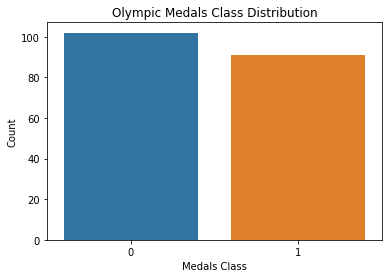

In [25]:
fig, ax = plt.subplots()
sns.countplot(x='Medals',data=scrubbed_df, ax=ax)
ax.set_title('Olympic Medals Class Distribution')
ax.set_xlabel('Medals Class')
ax.set_ylabel('Count')

Plot distribution for each independent variable

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

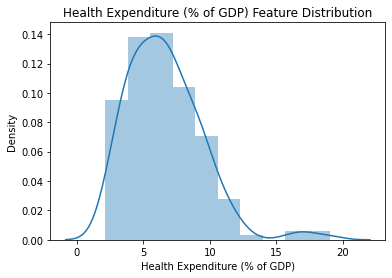

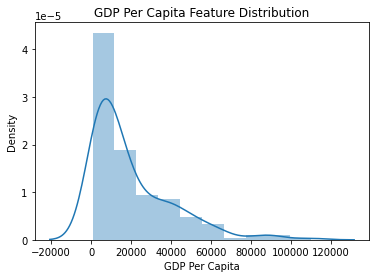

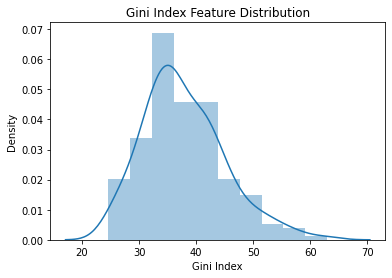

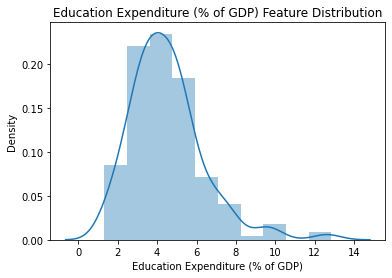

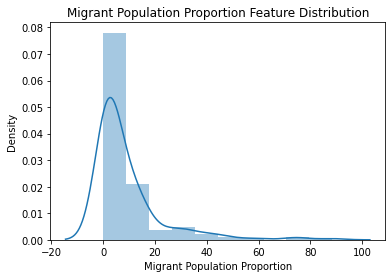

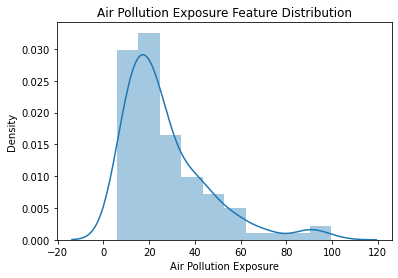

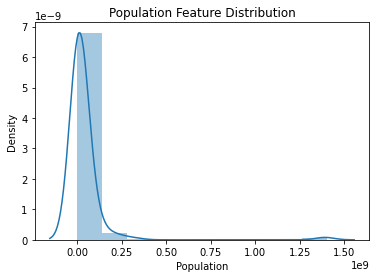

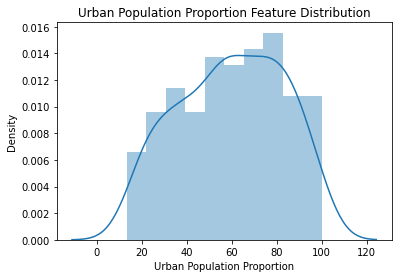

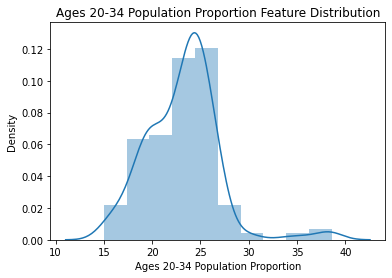

In [31]:
features = list(scrubbed_df.columns)
features.remove('Medals')
for feat in features:
    fig, ax = plt.subplots()
    sns.distplot(scrubbed_df[feat], kde=True, bins=10, ax=ax)
    ax.set_title(f'{feat} Feature Distribution')

Calculate vif for each feature to confirm no correlated features need to be dropped

In [43]:
vif_df = add_constant(scrubbed_df.drop(columns='Medals'))
vif_output = []
for num in range(0, len(vif_df.columns)):
    vif_output.append([vif_df.columns[num], variance_inflation_factor(vif_df.values, num)])
vif_output_df = pd.DataFrame(vif_output, columns=['Column', 'VIF'])
vif_output_df.sort_values(by='VIF', ascending=False, inplace=True)
vif_output_df

,Column,VIF
0,const,111.946243
2,GDP Per Capita,3.158619
5,Migrant Population Proportion,2.566672
8,Urban Population Proportion,1.769384
9,Ages 20-34 Population Proportion,1.763352
1,Health Expenditure (% of GDP),1.597949
6,Air Pollution Exposure,1.576137
4,Education Expenditure (% of GDP),1.377120
3,Gini Index,1.337374
7,Population,1.132205


# Model Data